<a href="https://colab.research.google.com/github/akshat-020/Credit-Card-Fraud-Detection/blob/main/credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
Total_transactions = len(df)
normal = len(df[df.Class == 0])
fraudulent = len(df[df.Class == 1])
fraud_percentage = round(fraudulent/normal*100, 2)

In [ ]:
fraud_percentage

0.17

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.drop(['Time'], axis=1, inplace=True)

Normalise the Amount column

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
amount = df['Amount'].values
df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))
df.drop_duplicates(inplace=True)

In [ ]:
df.shape


(275663, 30)

Split the data:


In [ ]:

X= df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y=df['Class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [ ]:
%matplotlib inline

In [ ]:
#@title
#sns.pairplot(df)

In [ ]:
#sns.barplot(x='V1', y='Amount',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


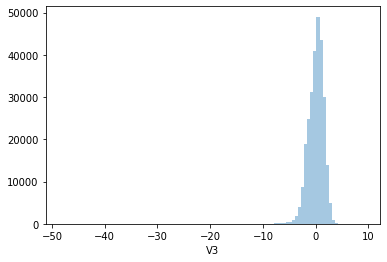

In [ ]:
sns.distplot(df['V3'],bins=100,kde=False)

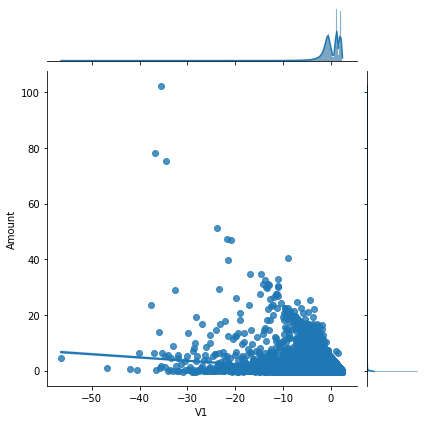

In [ ]:
sns.jointplot(x=df['V1'], y=df['Amount'],kind='reg')

In [ ]:
dfc=df.corr()

In [ ]:
dfc

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000000,0.009002,0.005952,-0.000042,-0.018593,-0.005789,-0.006843,-0.000490,-0.007093,0.003115,-0.005238,-0.005225,0.000176,-0.000167,-0.008538,-0.006376,-0.001709,-0.000037,-0.000366,0.003109,0.006004,0.003634,-0.007504,-0.009327,-0.004446,-0.002436,-0.014628,-0.003555,-0.225854,-0.094718
V2,0.009002,1.000000,0.004976,-0.004095,0.004655,0.004290,0.004866,0.003743,0.001116,0.002764,-0.001808,0.001480,0.000461,0.004772,0.001176,0.002648,0.001304,0.000363,0.001164,-0.000339,-0.003881,0.002909,-0.003689,0.001974,-0.002837,-0.000296,0.007252,0.001458,-0.534153,0.084754
V3,0.005952,0.004976,1.000000,-0.000721,0.011020,0.014780,-0.014016,0.003733,-0.002896,-0.011064,0.003763,-0.003365,-0.000753,-0.008208,0.003324,0.000336,-0.002813,-0.003876,-0.000828,-0.004587,0.001818,-0.004203,0.002183,0.009782,0.004091,0.003596,-0.008780,-0.002454,-0.220547,-0.185772
V4,-0.000042,-0.004095,-0.000721,1.000000,0.006710,0.012535,0.000806,0.004996,0.001395,0.003366,-0.004402,0.000561,0.000332,0.005336,0.004045,0.001783,0.001633,0.001569,0.005018,0.001165,-0.000623,0.001581,-0.000155,0.005759,0.000173,-0.001105,0.002517,0.000028,0.100626,0.130313
V5,-0.018593,0.004655,0.011020,0.006710,1.000000,-0.029701,-0.009107,-0.002605,-0.000786,-0.002818,-0.002965,-0.000343,0.001201,0.005175,-0.007122,-0.004147,-0.005422,-0.003108,0.000351,-0.000788,0.003439,0.002971,-0.001058,-0.012634,-0.004862,-0.001568,-0.006116,-0.000711,-0.390280,-0.088642
V6,-0.005789,0.004290,0.014780,0.012535,-0.029701,1.000000,0.013087,-0.012301,-0.002290,-0.002723,0.000446,0.004288,-0.000140,0.000178,-0.009363,-0.002538,0.001747,0.000734,0.000880,-0.001835,-0.001584,0.002355,-0.000221,-0.021098,-0.006673,0.000702,-0.001577,0.000617,0.224967,-0.044777
V7,-0.006843,0.004866,-0.014016,0.000806,-0.009107,0.013087,1.000000,-0.000987,-0.001657,-0.012246,0.001731,-0.007378,0.001019,-0.002006,0.002165,-0.003553,-0.009985,-0.004092,0.000590,-0.002196,0.008635,-0.001701,0.003458,0.005375,0.002070,-0.000459,-0.003977,0.001329,0.401573,-0.173292
V8,-0.000490,0.003743,0.003733,0.004996,-0.002605,-0.012301,-0.000987,1.000000,0.000168,0.000239,0.005165,-0.004134,-0.001341,-0.009568,-0.002322,-0.006868,-0.006049,-0.002092,0.000855,0.000562,0.018806,-0.005182,0.006461,-0.006000,-0.002827,-0.001122,-0.000108,0.000201,-0.104572,0.033364
V9,-0.007093,0.001116,-0.002896,0.001395,-0.000786,-0.002290,-0.001657,0.000168,1.000000,-0.004957,-0.001583,0.000221,-0.000259,-0.005125,-0.004912,0.002680,-0.000488,-0.000957,-0.000936,0.000613,0.001744,0.000742,-0.001739,-0.002454,-0.000358,0.005307,0.008066,0.006487,-0.041446,-0.094583
V10,0.003115,0.002764,-0.011064,0.003366,-0.002818,-0.002723,-0.012246,0.000239,-0.004957,1.000000,0.005211,-0.007395,0.000890,-0.004616,0.003366,-0.003637,-0.001841,0.000911,0.000379,-0.004506,0.002396,-0.003012,0.001760,0.001015,0.002499,-0.000859,0.011495,0.009956,-0.104586,-0.208104


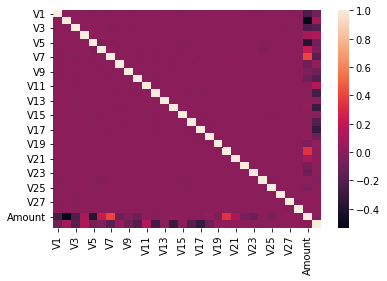

In [ ]:
sns.heatmap(dfc)

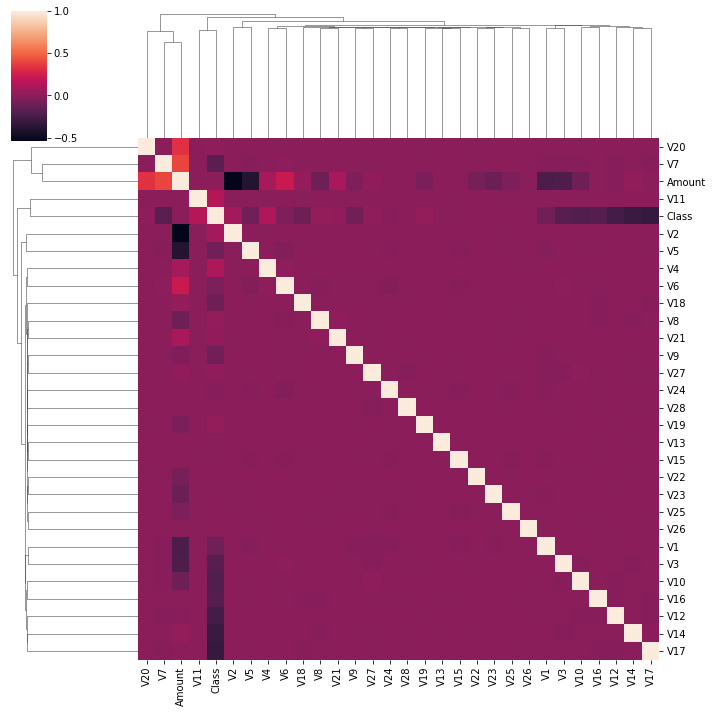

In [ ]:
#df.pivot_table(index='',columns='',values='')
sns.clustermap(dfc)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


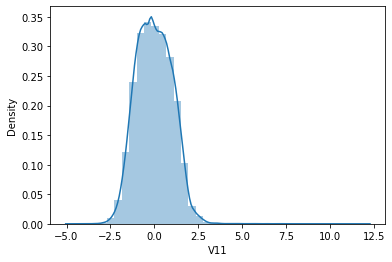

In [ ]:
sns.distplot(df['V11'],bins=40)

LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_out=lr.predict(X_test)

In [ ]:
y_out


array([0, 0, 0, ..., 0, 0, 0])

accuracy


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test,y_out)))
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test,y_out)))



Accuracy score of the Logistic Regression model is 0.9989552498694062
F1 score of the Logistic Regression model is 0.6666666666666666


K-Nearest Neighbors


Support Vector Machines


RANDOM FOREST/Decision tree


ARTIFICIAL NEURAL NETWORK
